# <font face = 'Impact' color = '#FFAEBC' > Exploring Associations between Variables <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a comprehensive analysis of variable associations while ensuring key statistical assumptions are met. It begins with an exploratory data analysis, checking for normality, linearity, presence of outliers, and homoscedasticity using visualizations and statistical tests. After verifying assumptions, the notebook applies appropriate correlation techniques such as Pearson, Spearman, and Kendall’s Tau-b, ensuring robust insights into the relationships between variables.

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd

In [3]:
# Loading our data set SyntheticRetail.xlsx
df = pd.read_excel("SyntheticRetail.xlsx")
df.head()

,Customer_Count,Daily_Sales,Inventory_Level,Ad_Spend,Staff_Count,Discount_Rate
0,191,9484.95,594,109.87,10,5.14
1,181,9709.27,518,245.10,12,10.67
2,206,10175.87,456,318.68,11,14.32
3,166,8632.38,529,435.93,14,11.66
4,207,10578.91,319,150.99,13,13.23


In [4]:
# Checking out the information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Count   1200 non-null   int64  
 1   Daily_Sales      1200 non-null   float64
 2   Inventory_Level  1200 non-null   int64  
 3   Ad_Spend         1200 non-null   float64
 4   Staff_Count      1200 non-null   int64  
 5   Discount_Rate    1200 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 56.4 KB


In [5]:
# Generating Quick Descriptives and AD Statistic
qd.desc(df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Customer_Count,1200.0,199.55,19.25,200.00,13.00,153.00,247.00,0.42,0.78
Daily_Sales,1200.0,9998.97,956.08,10003.31,623.21,7673.65,12326.35,0.34,0.78
Inventory_Level,1200.0,454.20,85.88,456.50,73.50,300.00,599.00,12.71,0.78
Ad_Spend,1200.0,297.17,114.91,294.91,98.52,100.07,499.01,13.88,0.78
Staff_Count,1200.0,10.96,2.00,11.00,2.00,8.00,14.00,29.32,0.78
Discount_Rate,1200.0,9.94,2.88,9.88,2.54,5.00,14.99,13.95,0.78



--- Variable: Customer_Count ---
  Anderson-Darling Statistic : 0.4227
  Critical Value (@ 5.0%) : 0.7840
  Decision : Fail to Reject Null


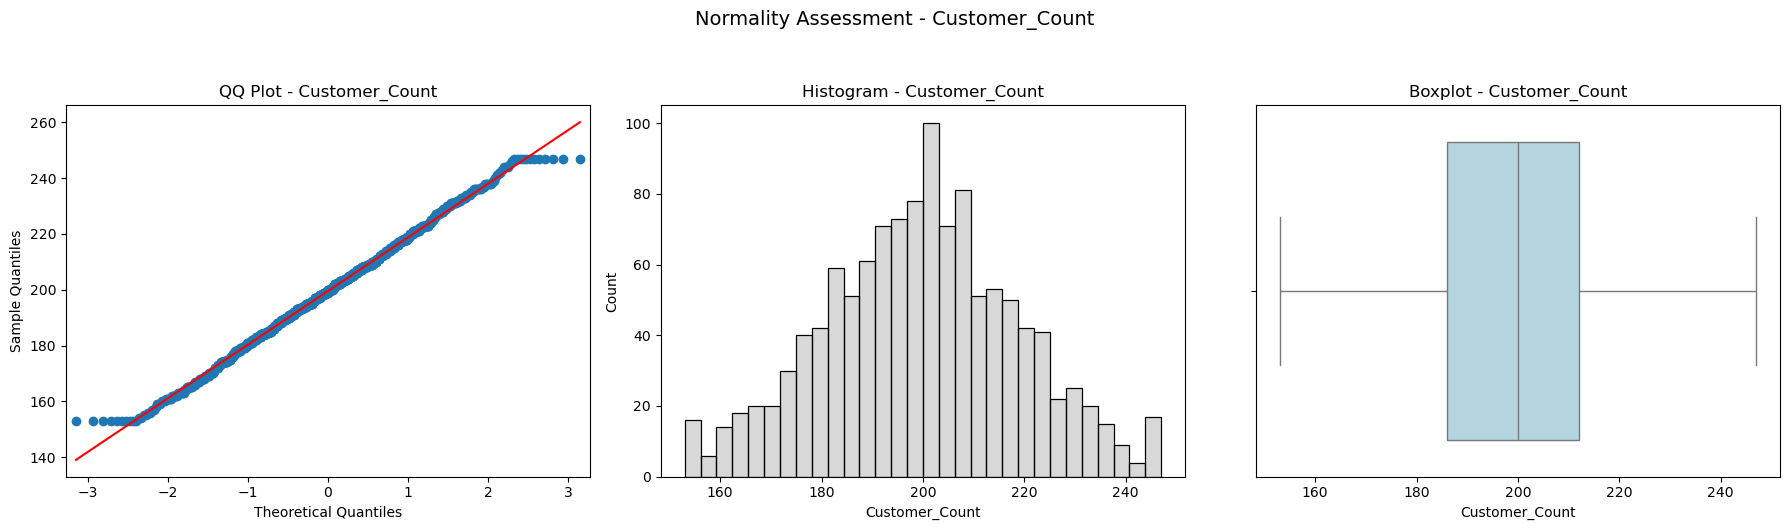


--- Variable: Daily_Sales ---
  Anderson-Darling Statistic : 0.3397
  Critical Value (@ 5.0%) : 0.7840
  Decision : Fail to Reject Null


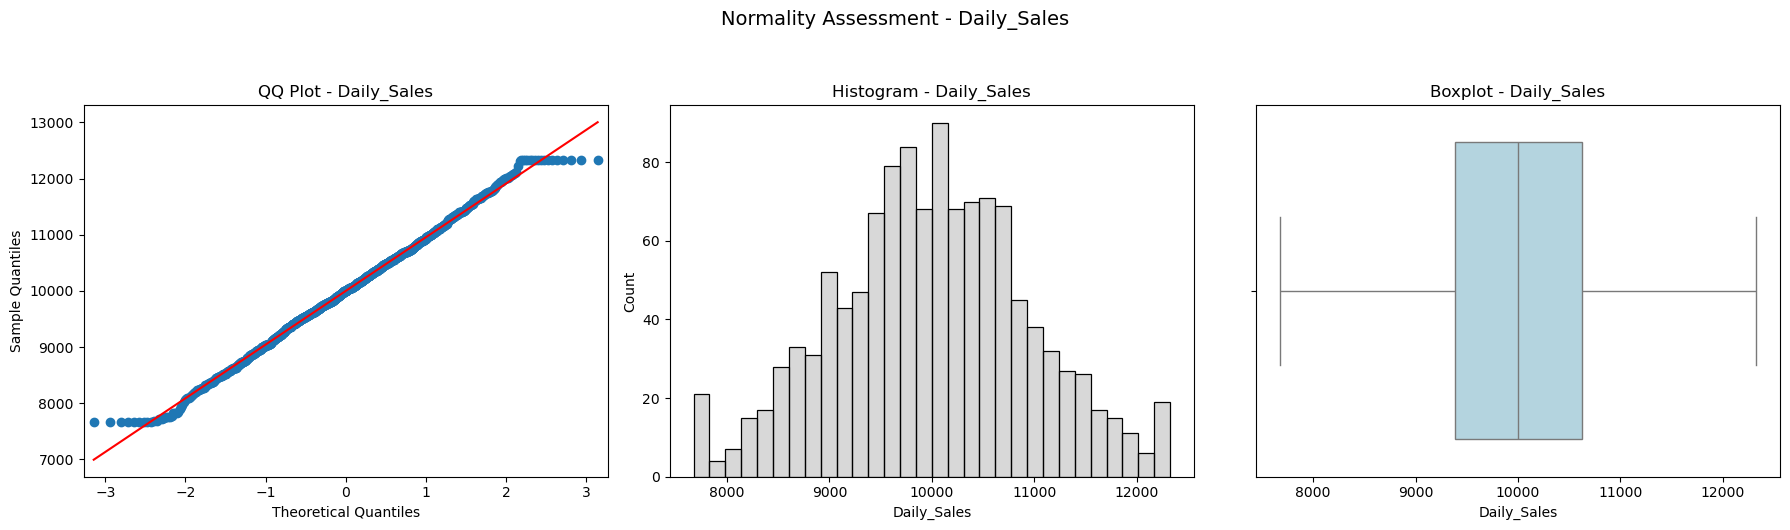


--- Variable: Inventory_Level ---
  Anderson-Darling Statistic : 12.7081
  Critical Value (@ 5.0%) : 0.7840
  Decision : Reject Null


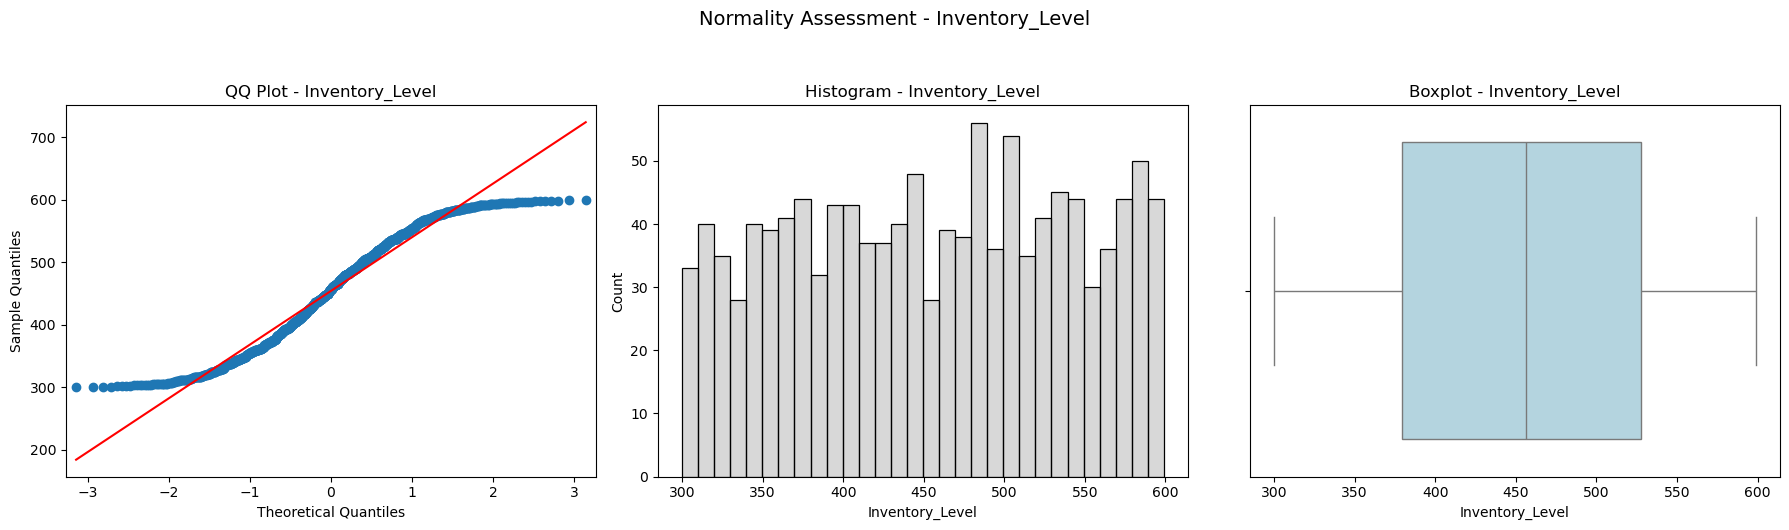


--- Variable: Ad_Spend ---
  Anderson-Darling Statistic : 13.8751
  Critical Value (@ 5.0%) : 0.7840
  Decision : Reject Null


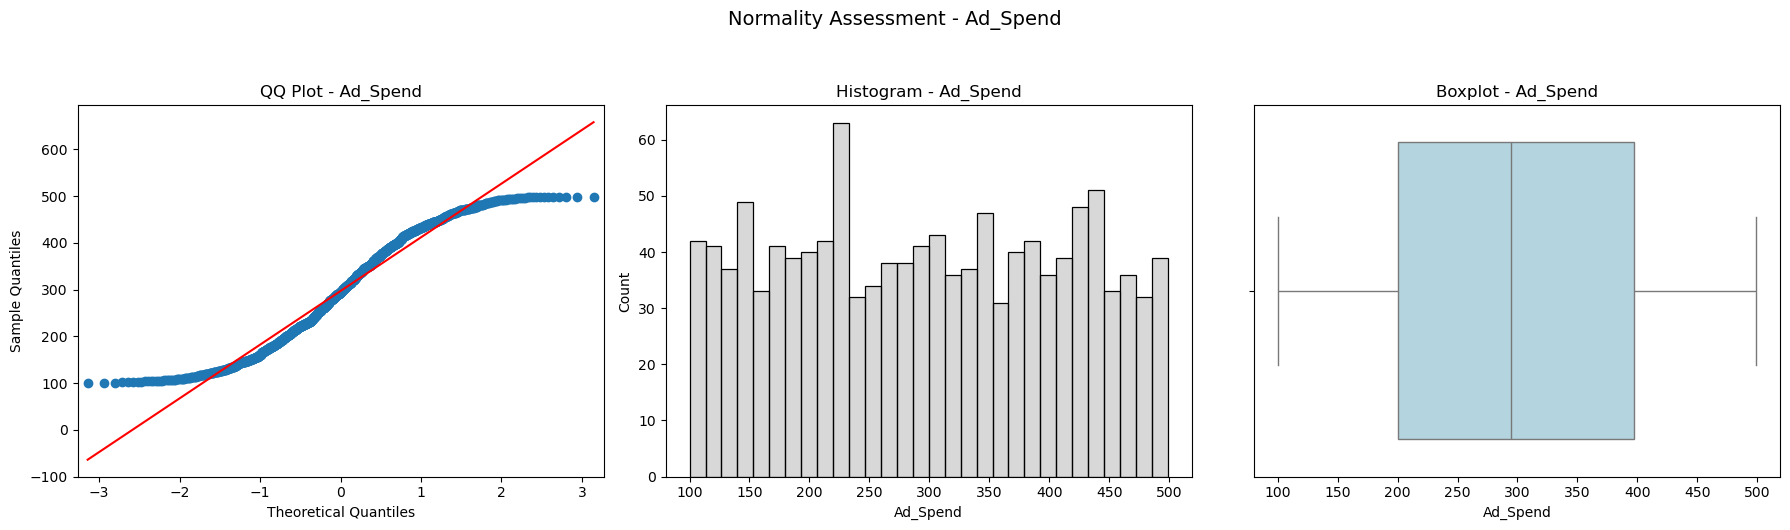


--- Variable: Staff_Count ---
  Anderson-Darling Statistic : 29.3195
  Critical Value (@ 5.0%) : 0.7840
  Decision : Reject Null


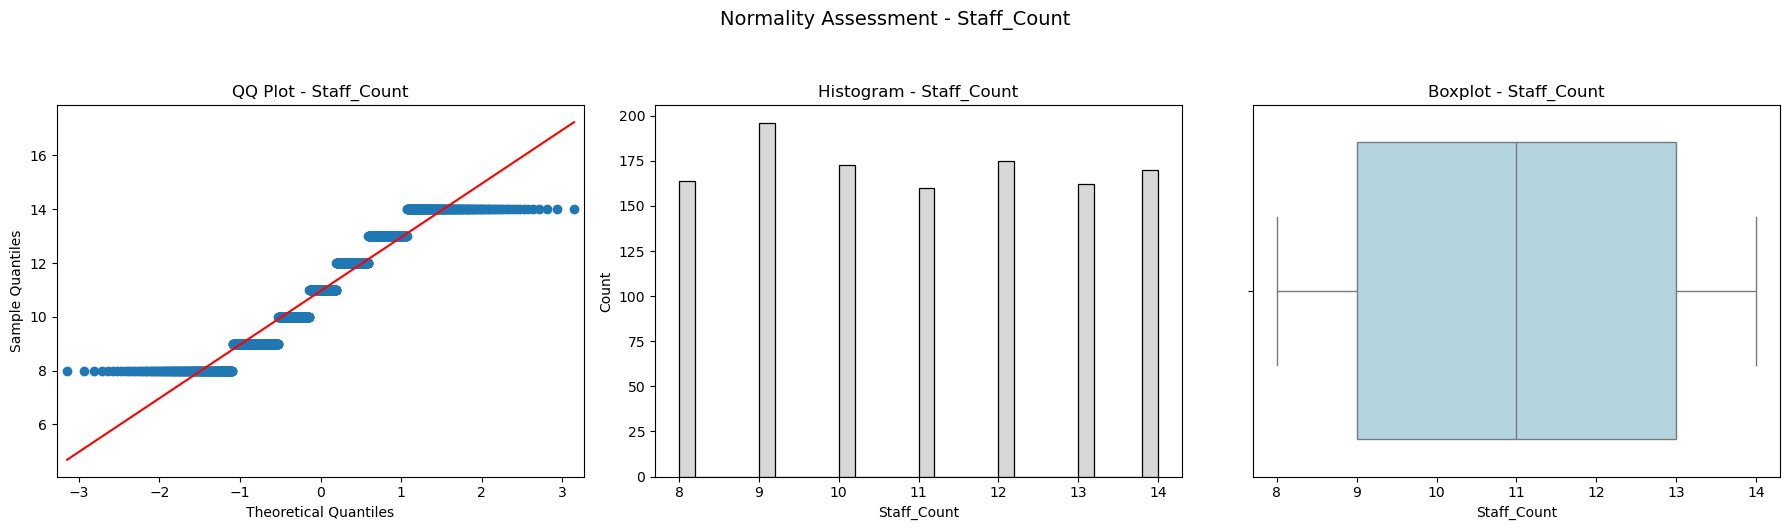


--- Variable: Discount_Rate ---
  Anderson-Darling Statistic : 13.9544
  Critical Value (@ 5.0%) : 0.7840
  Decision : Reject Null


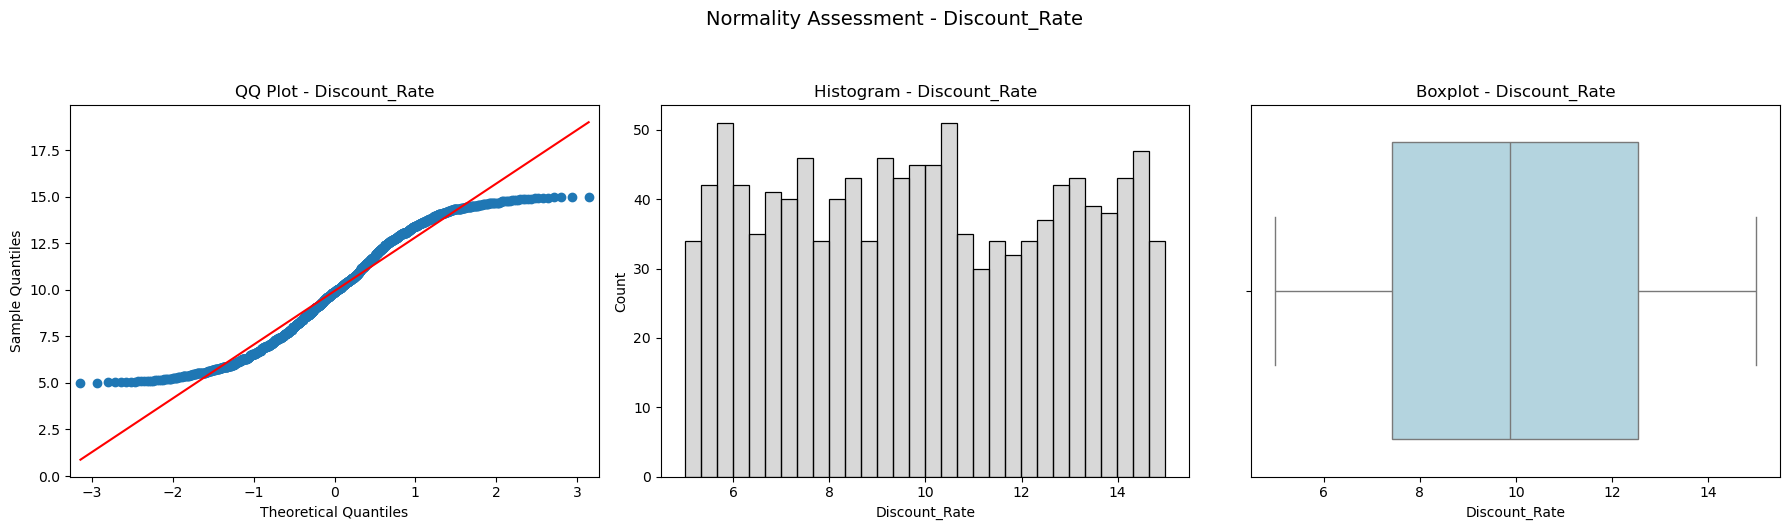

In [6]:
# Doing a normality check using AD-test and Data Visualizations
qd.normcheck_dashboard(df)

In [7]:
# Correlating Customer_Count and Daily_Sales
# Using Pearson Correlation since the variables are normally distributed.
pearson_corr, pearson_p = stats.pearsonr(df['Customer_Count'], df['Daily_Sales'])
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

Pearson correlation coefficient: 0.8939, p-value: 0.0000


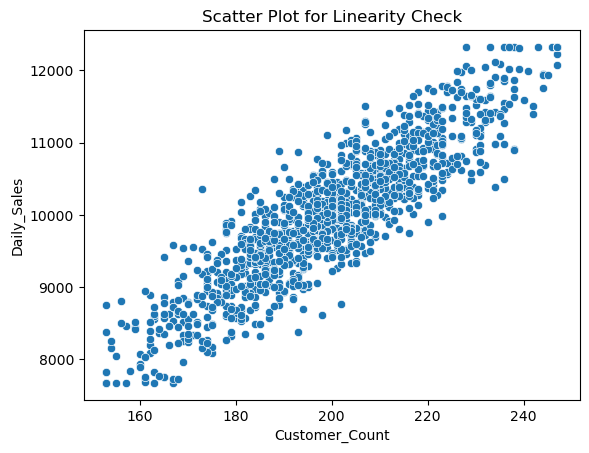

In [8]:
# Checking the scatterplot to visualize the relationship of these variables
sns.scatterplot(x=df['Customer_Count'], y=df['Daily_Sales'])
plt.title('Scatter Plot for Linearity Check')
plt.show()

In [9]:
# Correlating Ad_Spend and Customer_Count
# Choosing the Kendall's tau-b given that one of the variable is not normal.
kendall_corr, kendall_p = stats.kendalltau(df['Ad_Spend'], df['Customer_Count'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: -0.0008, p-value: 0.9685


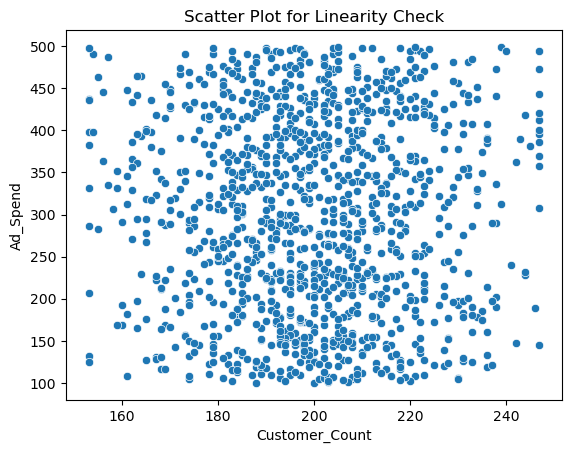

In [10]:
# Checking the scatterplot to visualize the relationship of these variables
sns.scatterplot(x=df['Customer_Count'], y=df['Ad_Spend'])
plt.title('Scatter Plot for Linearity Check')
plt.show()

In [11]:
# Correlating Discount_Rate and Customer_Count
# Choosing the Spearman Rho given that one of the variable is not normal.
spearman_corr, spearman_p = stats.spearmanr(df['Discount_Rate'], df['Customer_Count'])
print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

Spearman correlation coefficient: -0.0210, p-value: 0.4678


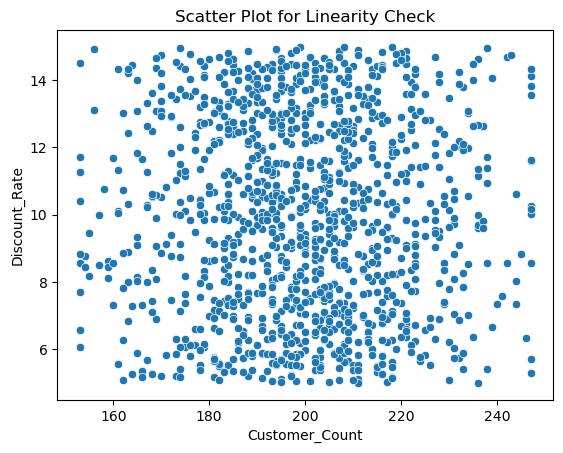

In [12]:
# Checking the scatterplot to visualize the relationship of these variables
sns.scatterplot(x=df['Customer_Count'], y=df['Discount_Rate'])
plt.title('Scatter Plot for Linearity Check')
plt.show()